In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from MultiClassLogisticRegressionAlgo import MultiClassLogisticRegression

In [2]:
iris_dt = datasets.load_iris()
X , y = iris_dt.data, iris_dt.target
iris_target_name = iris_dt.target_names

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=46, test_size=0.2)

In [4]:
from sklearn.preprocessing import OneHotEncoder

iris_label_OH_encoder = OneHotEncoder()
iris_label_OH = iris_label_OH_encoder.fit_transform(y_train.reshape(-1,1))

In [5]:
multi_class_model = MultiClassLogisticRegression(n_iter=10000)
multi_class_model.fit(X_train, iris_label_OH)
y_pred = multi_class_model.predict(X_test)

In [6]:
from sklearn.preprocessing import OneHotEncoder

test_label_OH_encoder = OneHotEncoder()
test_label_OH = test_label_OH_encoder.fit_transform(y_test.reshape(-1,1))

In [7]:
y_pred_categorical = np.argmax(y_pred, axis=1)
y_test_categorical = np.argmax(test_label_OH.toarray(), axis=1)

In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix_iris = confusion_matrix(y_test_categorical, y_pred_categorical)
iris_results_df = pd.DataFrame(confusion_matrix_iris, index=iris_target_name, columns=iris_target_name)

Text(50.722222222222214, 0.5, 'Actual Label')

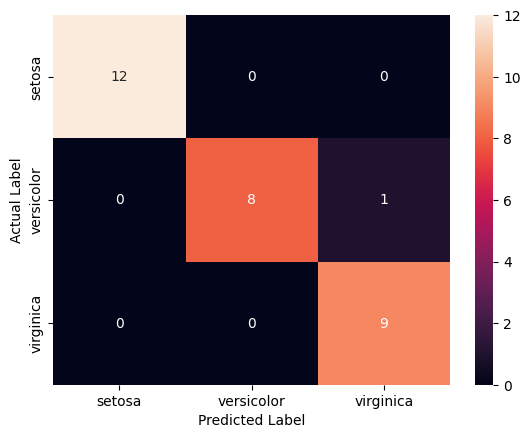

In [9]:
sns.heatmap(iris_results_df, annot=True)

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")